In [12]:
import pandas as pd
import harboropt_lp_basic
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
import seaborn as sns
%reload_ext autoreload
%autoreload 2

## Note: fixed costs are currently commented out in .py file.

In [2]:
runs = {}

for fuel_cost in np.arange(2, 15, 0.1):
    print(fuel_cost)
    lp = harboropt_lp_basic.DOSCOE(gas_fuel_cost=fuel_cost, discount_rate = 0.06, timespan=30)
    lp.solve()
    runs[fuel_cost] = lp 

2.0
Solver found optimal solution.
2.1
Solver found optimal solution.
2.2
Solver found optimal solution.
2.3000000000000003
Solver found optimal solution.
2.4000000000000004
Solver found optimal solution.
2.5000000000000004
Solver found optimal solution.
2.6000000000000005
Solver found optimal solution.
2.7000000000000006
Solver found optimal solution.
2.8000000000000007
Solver found optimal solution.
2.900000000000001
Solver found optimal solution.
3.000000000000001
Solver found optimal solution.
3.100000000000001
Solver found optimal solution.
3.200000000000001
Solver found optimal solution.
3.300000000000001
Solver found optimal solution.
3.4000000000000012
Solver found optimal solution.
3.5000000000000013
Solver found optimal solution.
3.6000000000000014
Solver found optimal solution.
3.7000000000000015
Solver found optimal solution.
3.8000000000000016
Solver found optimal solution.
3.9000000000000017
Solver found optimal solution.
4.000000000000002
Solver found optimal solution.
4

In [8]:
resources = runs[fuel_cost].resources.index

resource_capacity_lists = {}
for resource in resources:
    resource_capacity_lists[resource] = []
    
resource_gen_lists = {}
for resource in resources:
    resource_gen_lists[resource] = []   

In [9]:
fuel_costs = []
for key in runs:
    fuel_costs.append(key)
    capacity_breakdown = runs[key].capacity_results()
    for resource in resources:
        capacity = capacity_breakdown[resource]
        resource_capacity_lists[resource].append(capacity)
    gen_breakdown = runs[key].gen_results()
    for resource in resources:
        gen = gen_breakdown[resource]
        resource_gen_lists[resource].append(gen) 

In [5]:
#color_list = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [14]:
all_resources = resources.unique()
ordered_colors = ['k','c','r','orange','m','y','b']
resource_colors = {all_resources[i]: ordered_colors[i] for i in range(len(all_resources))}

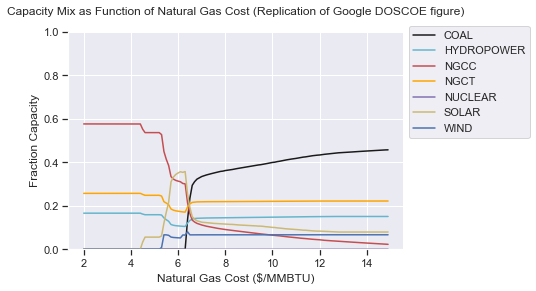

In [25]:
lines = []
fig, ax = plt.subplots()
for resource in resources:
    capacity_line = resource_capacity_lists[resource]
    plt.plot(fuel_costs, capacity_line, label = str(resource), color=resource_colors[resource]) 

sns.set()
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.77))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim([0.0,1.0])
ax.set_xlabel('Natural Gas Cost ($/MMBTU)')
ax.set_ylabel('Fraction Capacity')
ax.set_title('Capacity Mix as Function of Natural Gas Cost (Replication of Google DOSCOE figure)').set_position([.5, 1.05])

In [26]:
#fig.savefig('figures/harboropt_doscoeComparison_gasCostRange_capacityFraction.png',bbox_inches='tight',dpi=100) 

In [7]:
# for key in runs:
#     fuel_cost = key
#     resource = runs[key].resources.index[]
#     print('fuel cost = ' + str(fuel_cost), resource, runs[key].capacity_vars[resource].solution_value())